In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


%matplotlib inline
dataset = pd.read_csv("TSLA.csv")
dataset.shape

(2416, 7)

In [2]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
# dataset.describe()
dataset.pop("Volume")
dataset.pop("Adj Close")
dataset.pop("Low")
dataset.pop("High")
dataset.pop("Open")
le = preprocessing.LabelEncoder()
dataset['Date'] = le.fit_transform(dataset['Date'])
print(dataset)

      Date       Close
0        0   23.889999
1        1   23.830000
2        2   21.959999
3        3   19.200001
4        4   16.110001
...    ...         ...
2411  2411  566.900024
2412  2412  580.989990
2413  2413  640.809998
2414  2414  650.570007
2415  2415  780.000000

[2416 rows x 2 columns]


<AxesSubplot:xlabel='Date'>

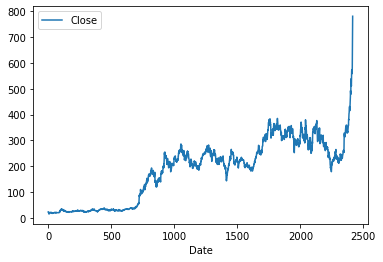

In [4]:
dataset.plot(x = 'Date', y = 'Close')

In [5]:
X = dataset.iloc[:,0]
y = dataset.iloc[:,1:]

0          0
1          1
2          2
3          3
4          4
        ... 
2411    2411
2412    2412
2413    2413
2414    2414
2415    2415
Name: Date, Length: 2416, dtype: int64            Close
0      23.889999
1      23.830000
2      21.959999
3      19.200001
4      16.110001
...          ...
2411  566.900024
2412  580.989990
2413  640.809998
2414  650.570007
2415  780.000000

[2416 rows x 1 columns]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
y_train.values.reshape(1, -1)
regr = linear_model.LinearRegression()
X_train= X_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [8]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

Coefficients: 
 [[0.15276057]]
Mean squared error: 3048.48
Coefficient of determination: 0.78


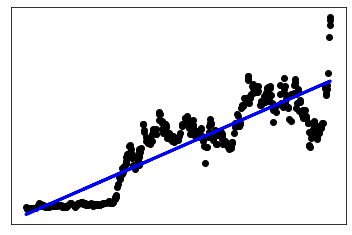

In [9]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
                     % mean_squared_error(y_test, y_pred))

# The coefficient of determinatinon: 1 is perfect prediction
print('Coefficient of determination: %.2f'
         % r2_score(y_test, y_pred))

#Plot outputs


plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()